# Openmp Mandelbrot - Speedup and efficiency plotting

### Imports

In [343]:
from operator import truediv
from matplotlib.pylab import plt

### Obtain speedup and efficiency

In [344]:
threads = [1,2,4,8,16]

In [345]:
def get_speedup(filename):
    data = [[float(n) for n in line.strip().split('\t')] for line in open(filename, 'r').readlines()]
    serial = data[0]
    data = data[1:]
    speedup = list(zip(*[list(map(truediv, serial, row)) for row in data]))[1:]
    
    return speedup

def get_efficiency(speedup):
    return [list(map(truediv, row, threads)) for row in speedup]    

### Plot speedup and efficiency for each schedule

In [346]:
legend = ["size: 600x400 iterations: 10⁴", "size: 3000x2000 iterations: 10⁴", 
          "size: 6000x4000 iterations: 10⁴", "size: 30000x20000 iterations: 10⁴",
          "size: 600x400 iterations: 10⁵", "size: 3000x2000 iterations: 10⁵", 
          "size: 6000x4000 iterations: 10⁵", "size: 30000x20000 iterations: 10⁵",
          "size: 600x400 iterations: 10⁶", "size: 3000x2000 iterations: 10⁶", 
          "size: 6000x4000 iterations: 10⁶", "size: 30000x20000 iterations: 10⁶"]

In [422]:
def plot_speedup(speedup):    
    %matplotlib inline
    
    plt.figure(figsize=(30,30))
    
    for i in range(0, len(speedup)):
        plt.plot(threads, speedup[i], label='$y = {i}x + {i}$'.format(i=i))
        
    plt.xlim(1, 16)
    plt.xlabel('Number of threads', fontsize=30)
    plt.ylim(1.0, 5)
    plt.ylabel('Speedup', fontsize=30)
    plt.legend(legend, loc='lower right', prop={'size': 30})
    plt.show()
    
def plot_efficiency(efficiency):
    %matplotlib inline
    
    plt.figure(figsize=(30,30))
    
    for i in range(0, len(efficiency)):
        plt.plot(threads, efficiency[i], label='$y = {i}x + {i}$'.format(i=i))
        
    plt.xlim(1, 16)
    plt.xlabel('Number of threads', fontsize=30)
    plt.ylim(0.0, 1.0)
    plt.ylabel('Efficiency', fontsize=30)
    plt.legend(legend, loc='upper right', prop={'size': 30})
    plt.show()

#### Dynamic schedule

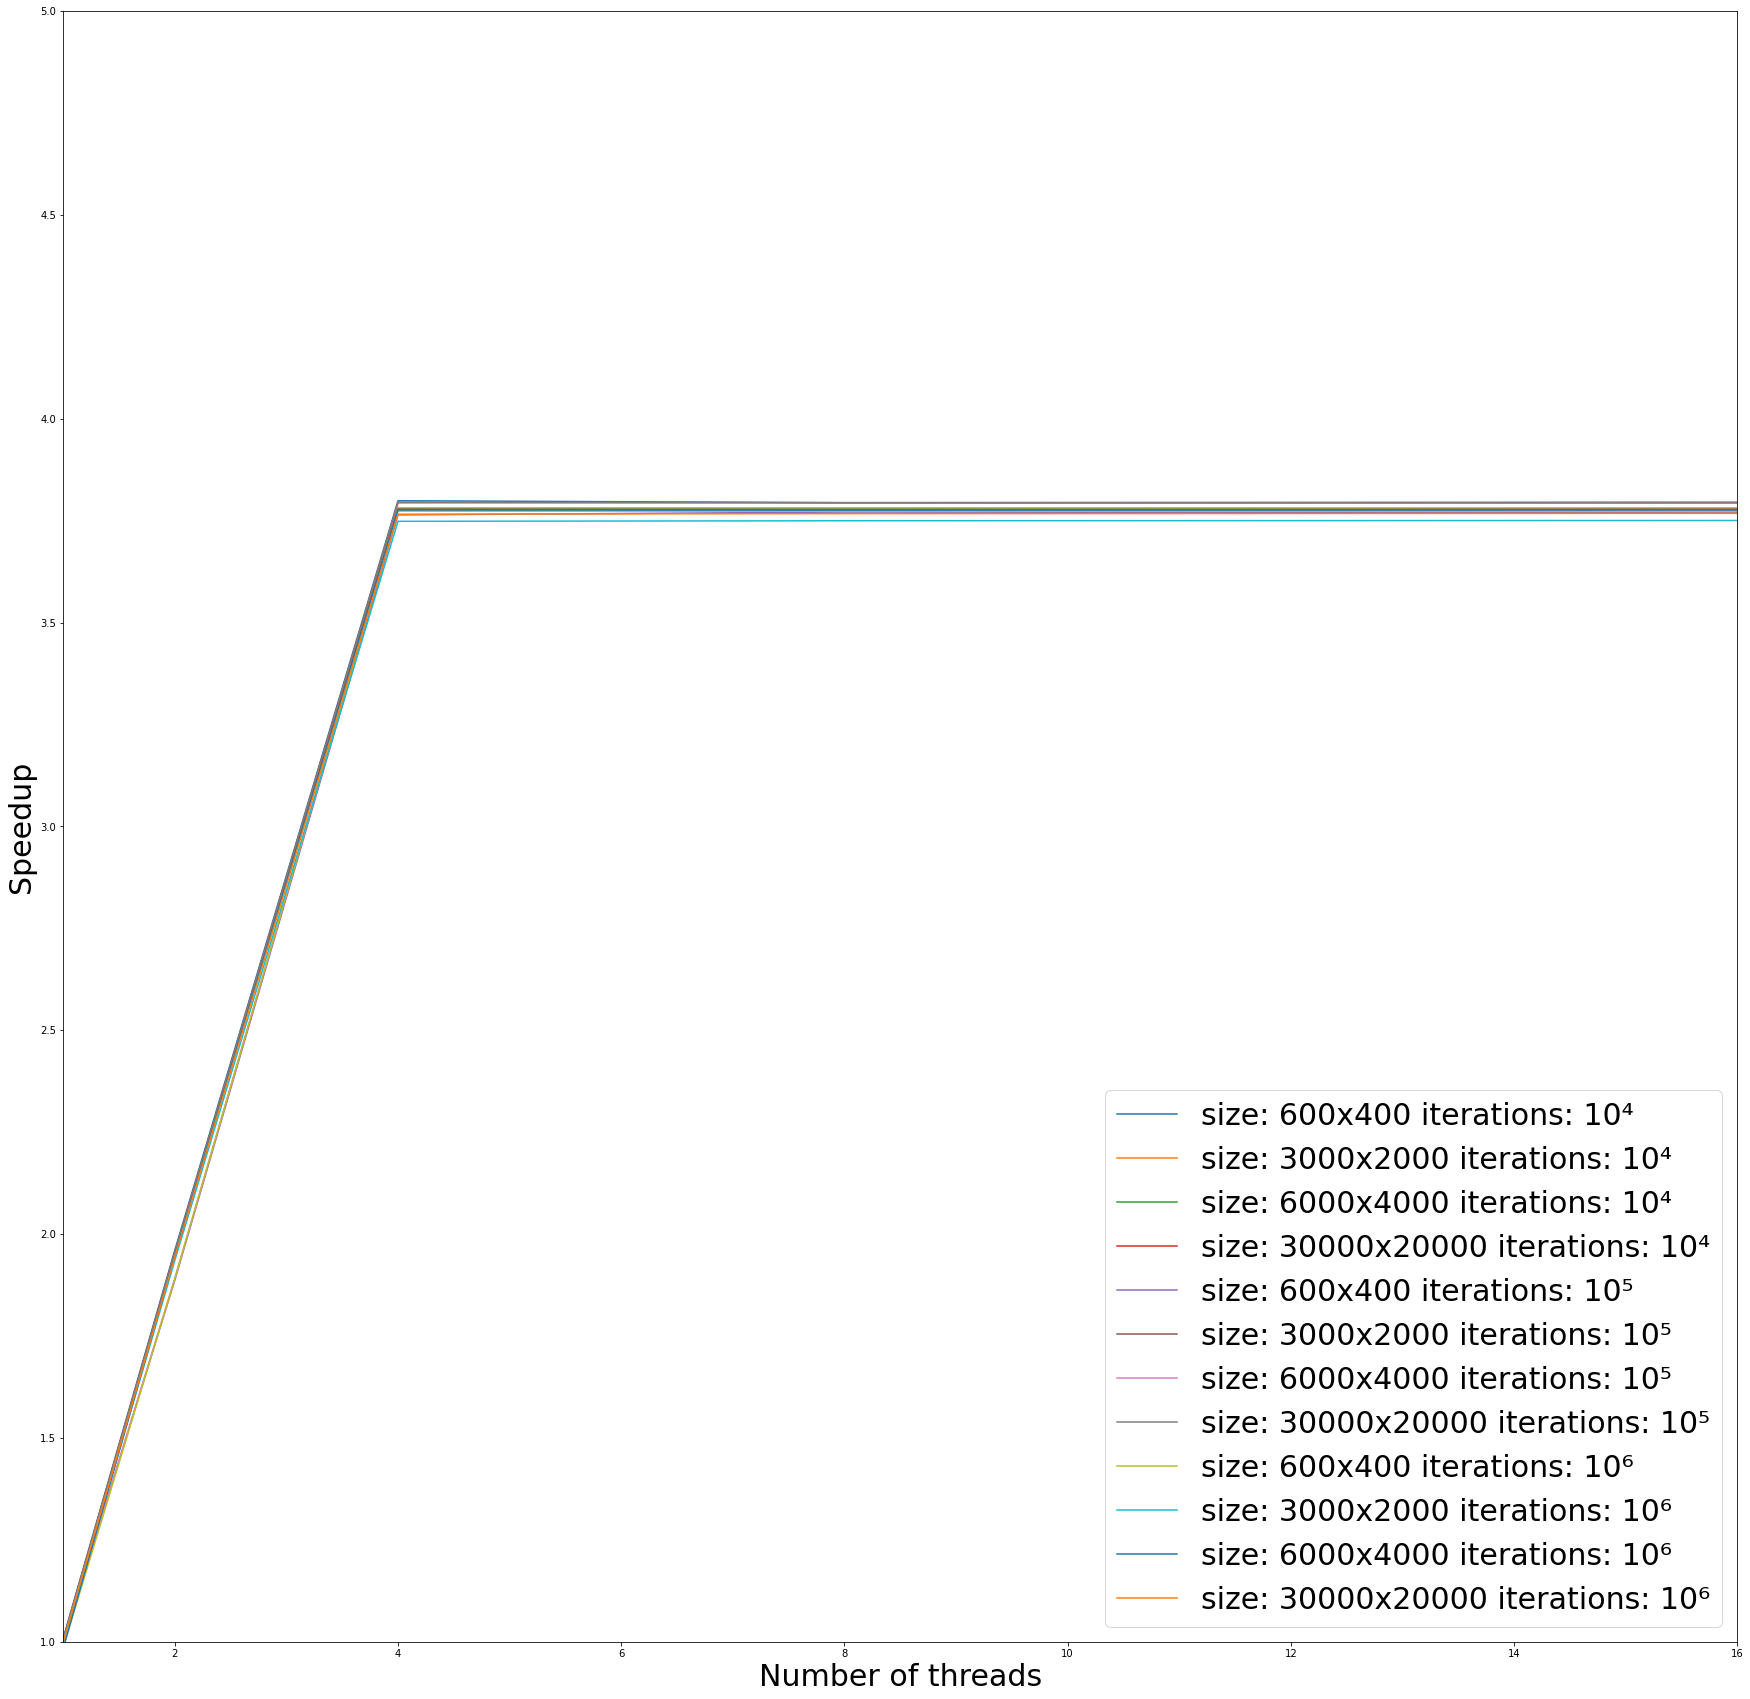

In [423]:
speedup_dynamic = get_speedup("../files/dynamic.txt")
plot_speedup(speedup_dynamic)

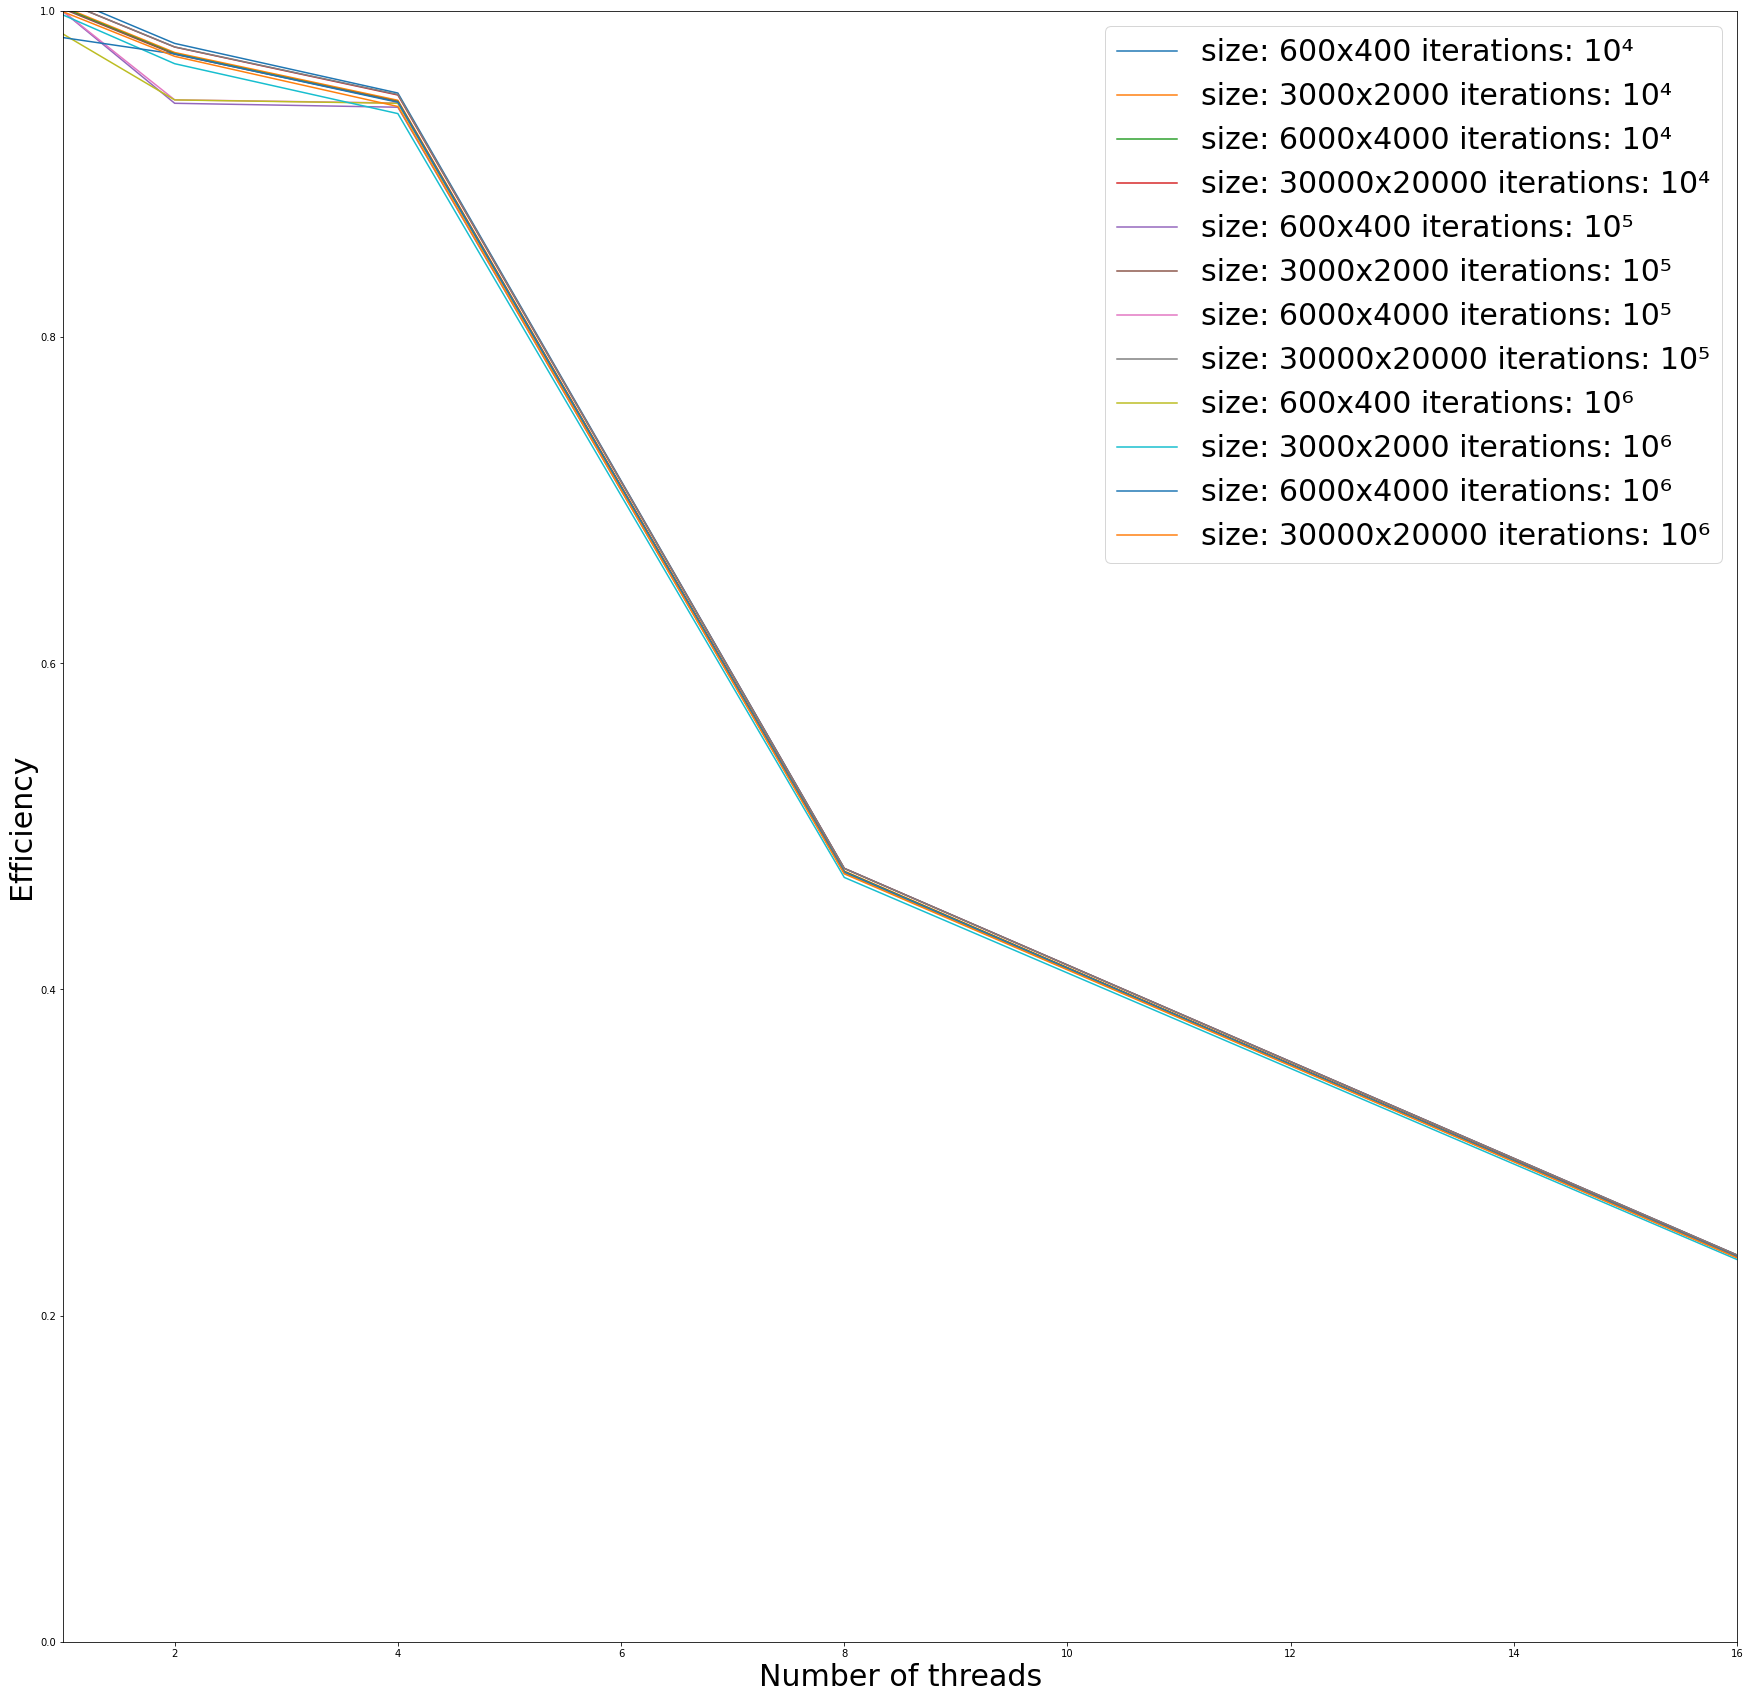

In [424]:
plot_efficiency(get_efficiency(speedup_dynamic))

#### Static schedule

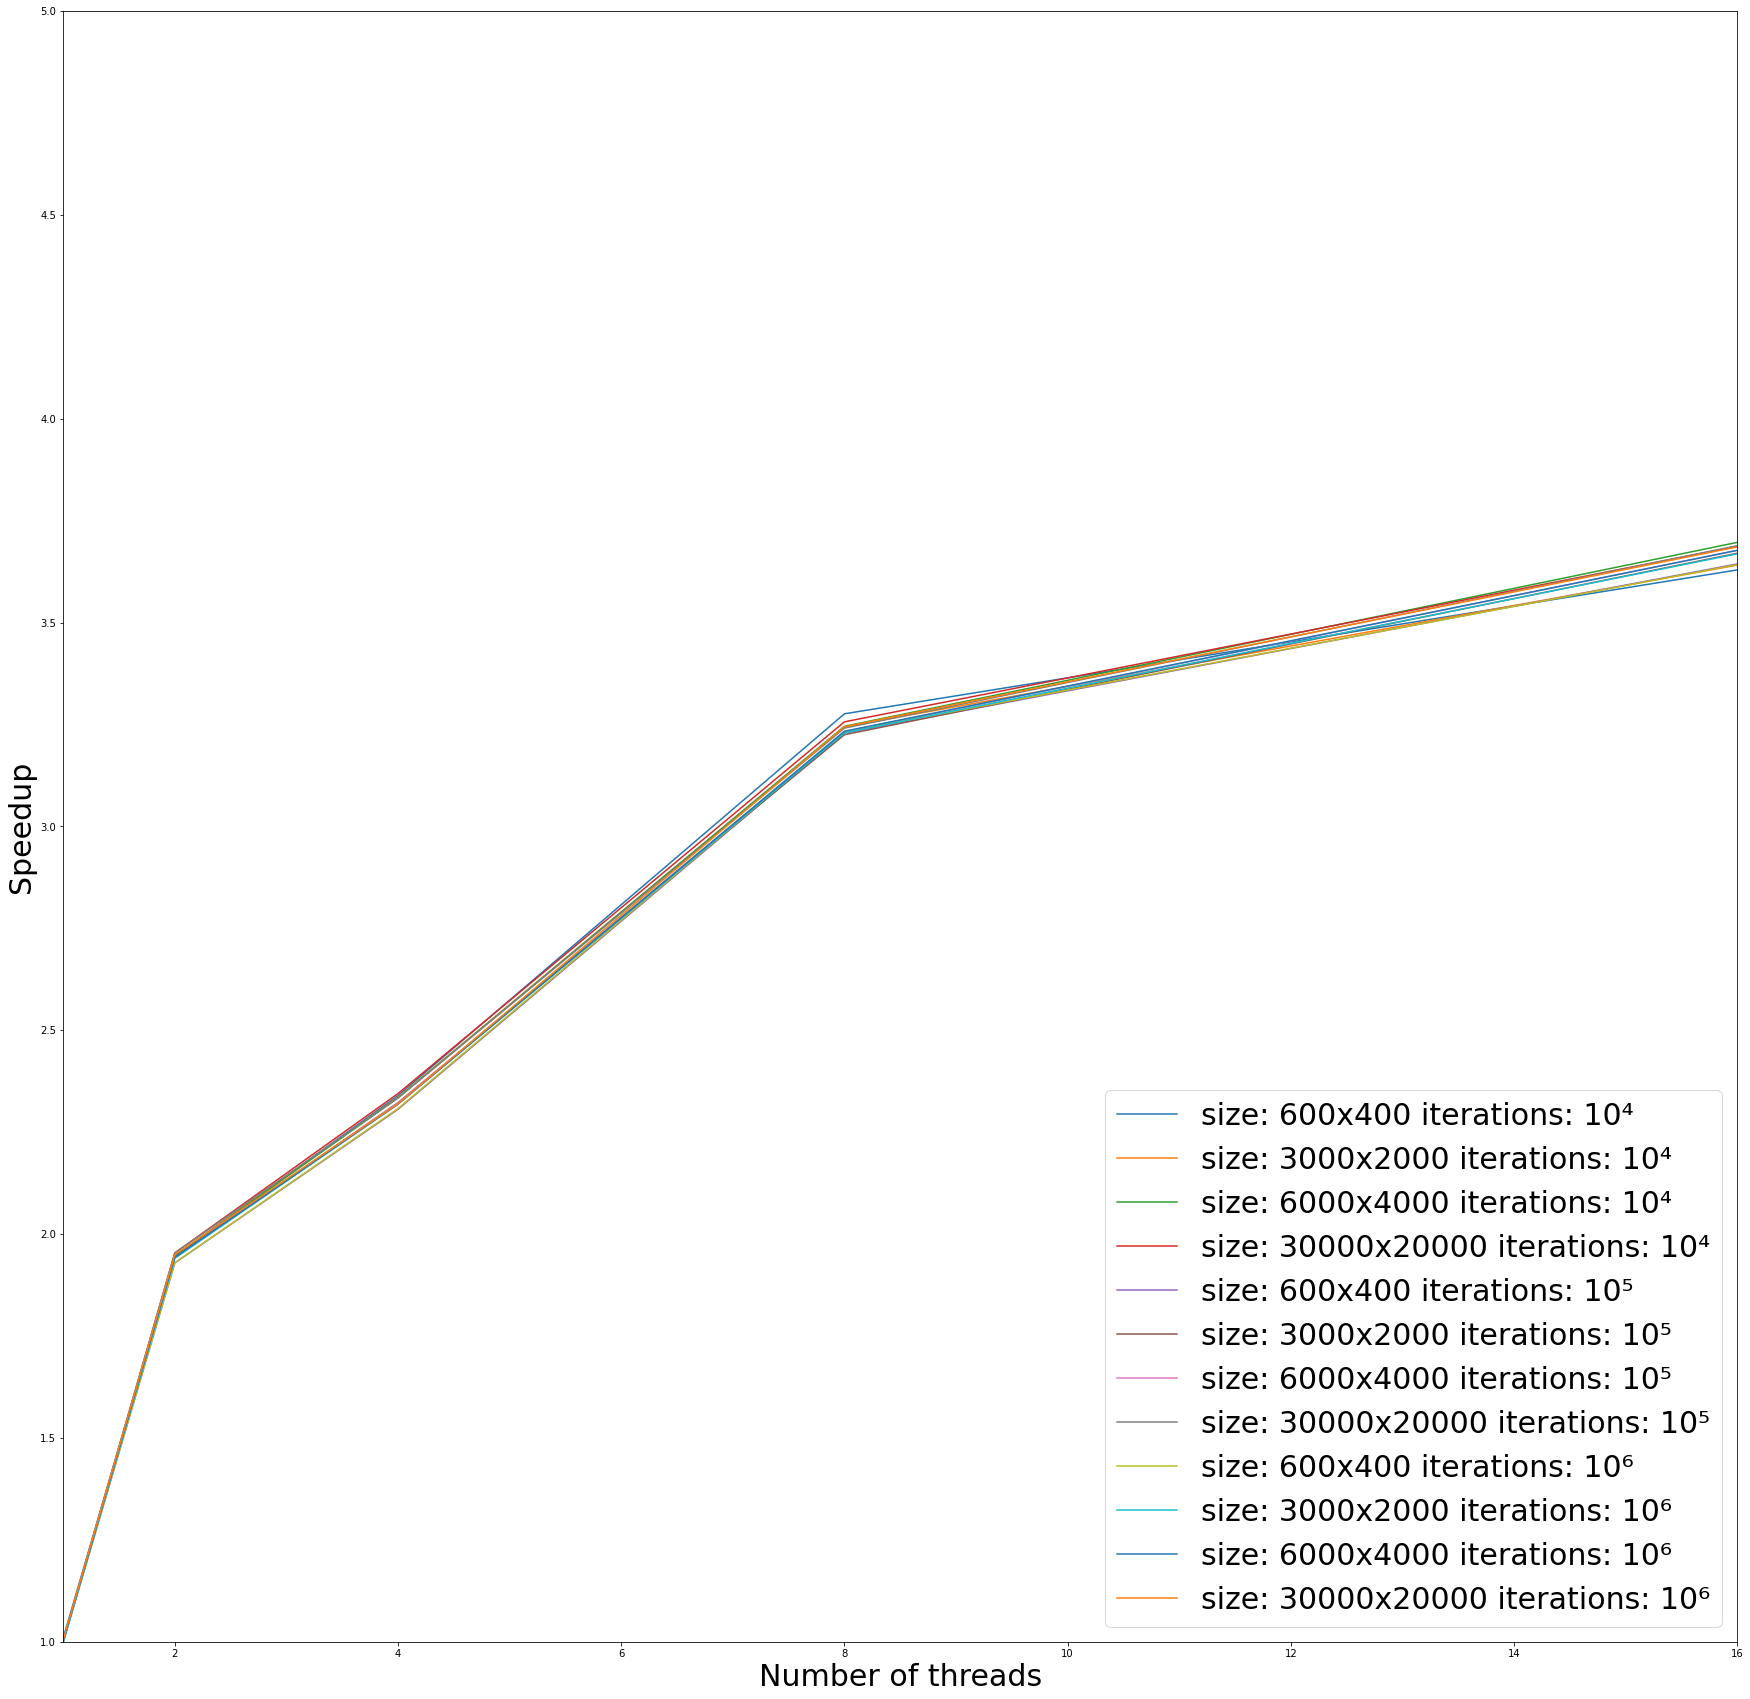

In [425]:
speedup_static = get_speedup("../files/static.txt")
plot_speedup(speedup_static)

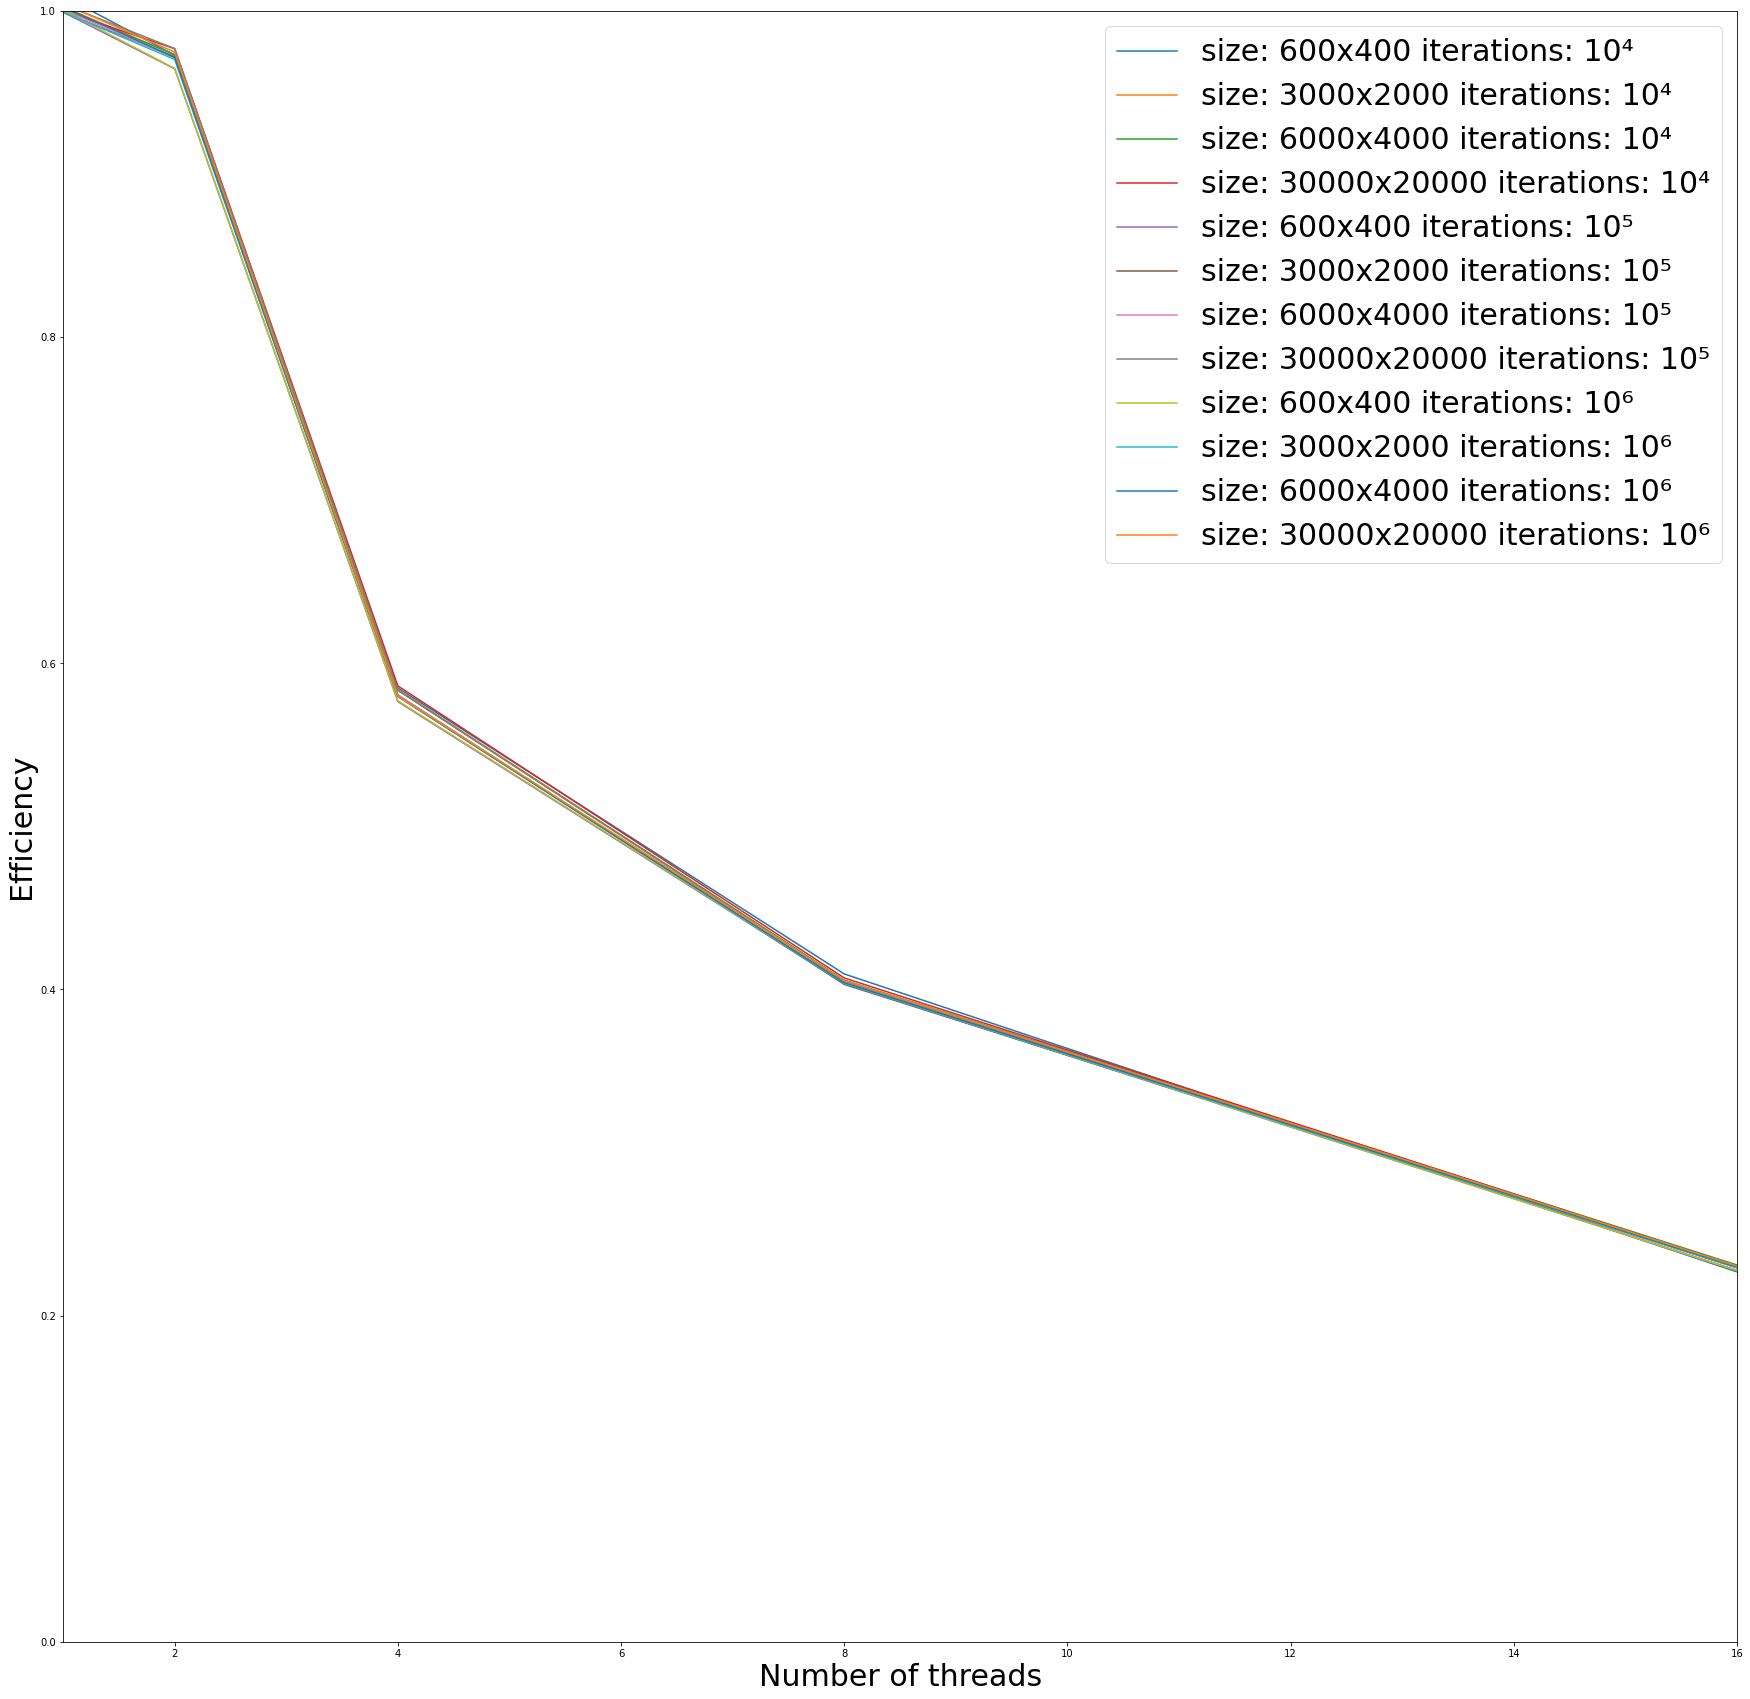

In [426]:
plot_efficiency(get_efficiency(speedup_static))

#### Guided schedule

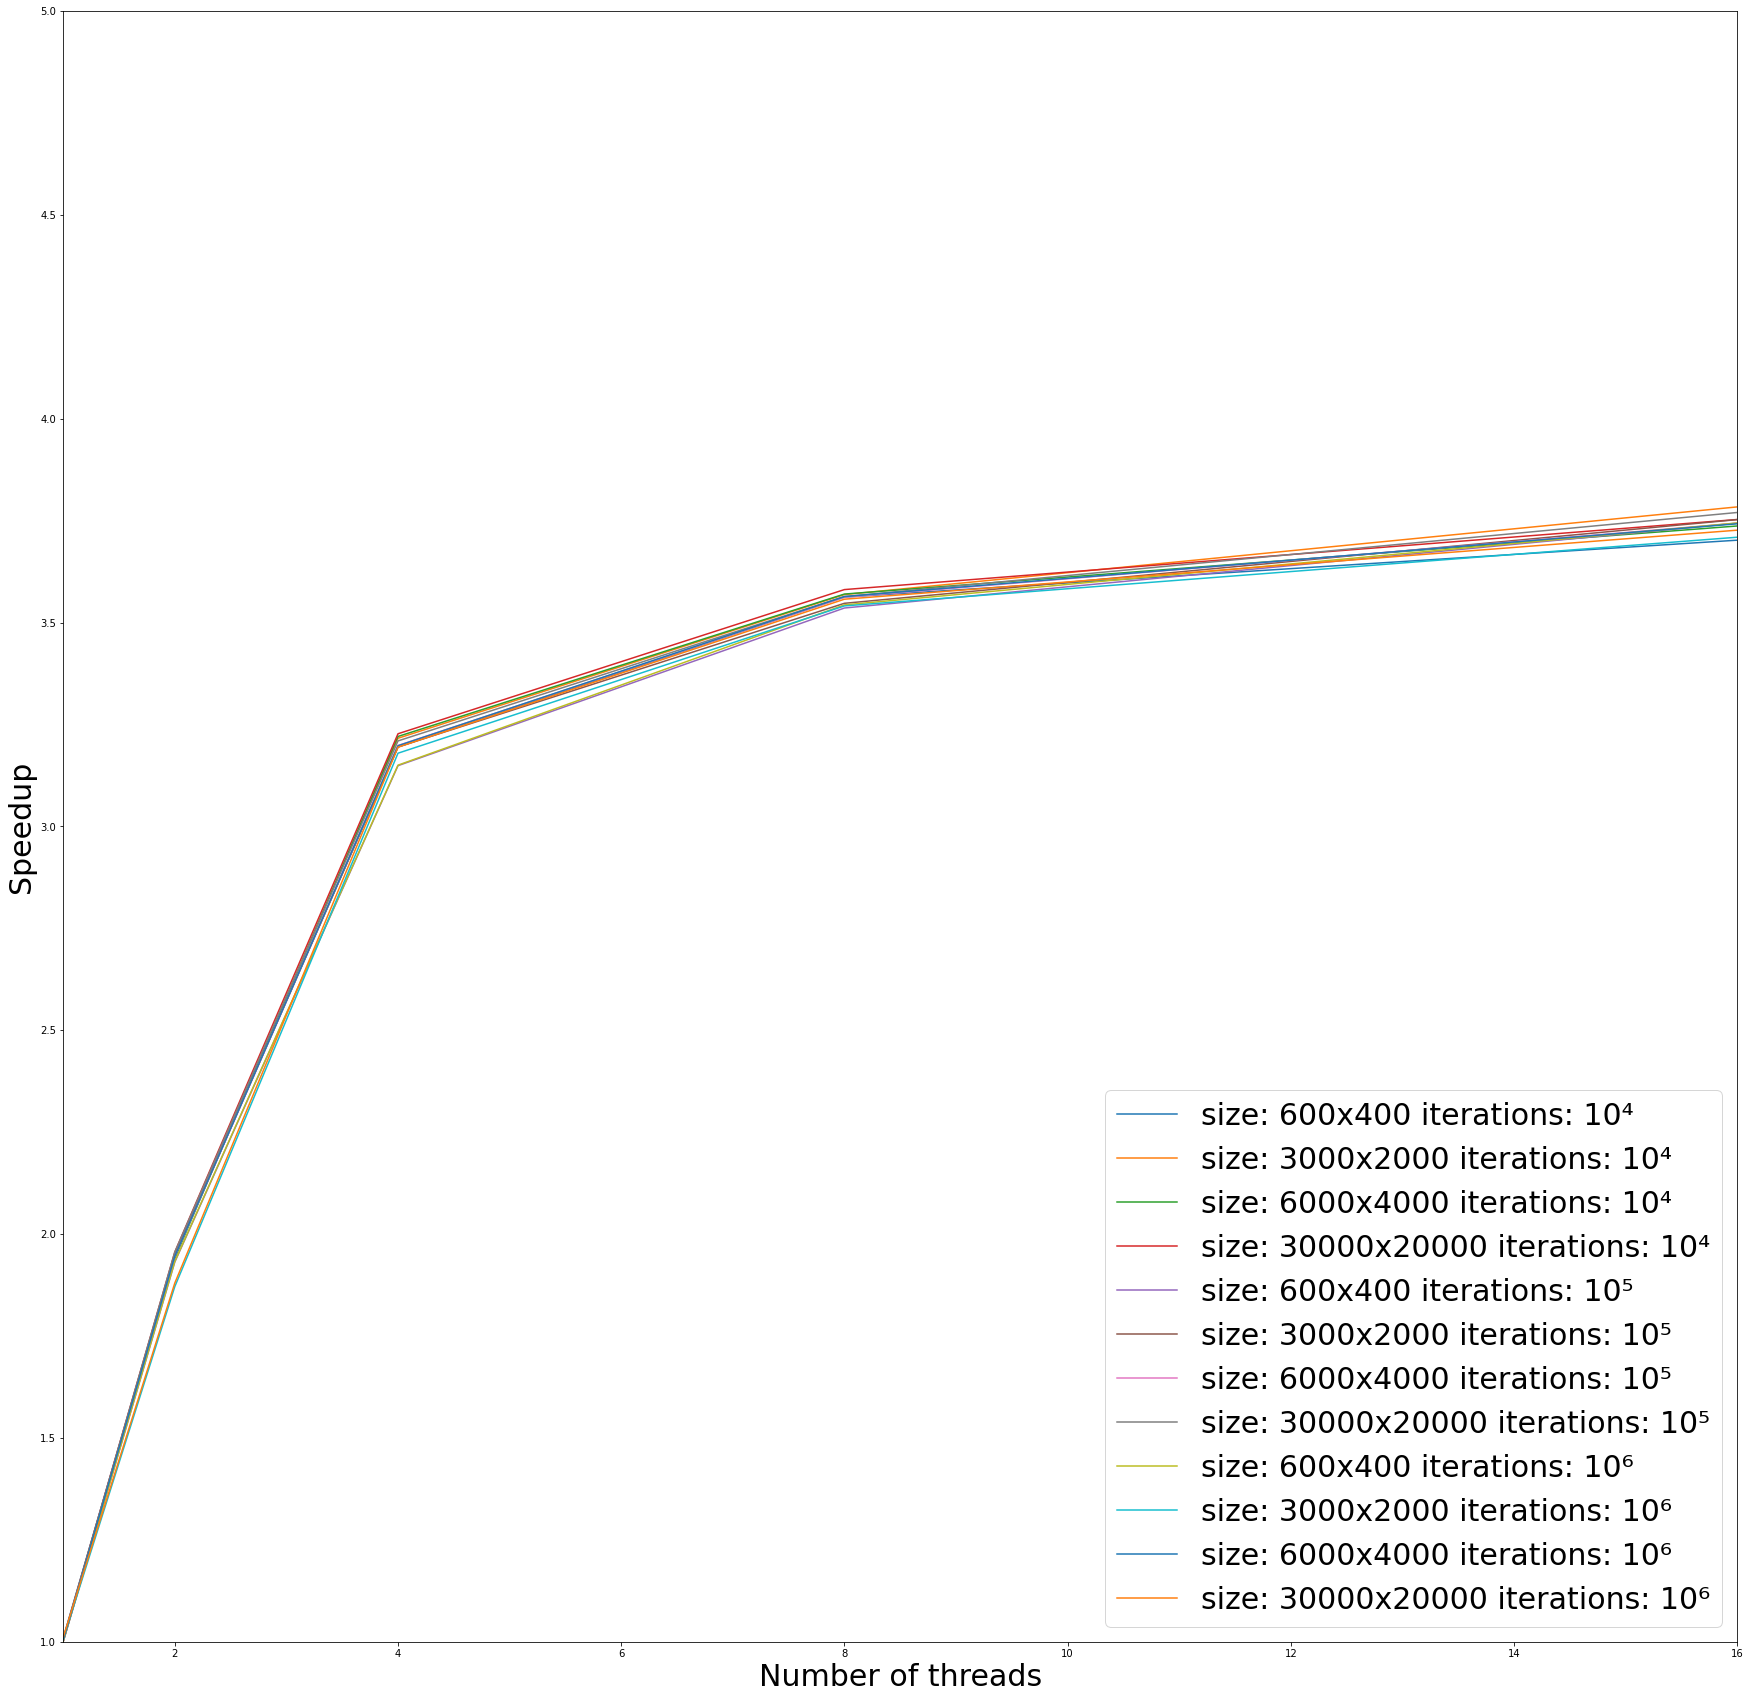

In [427]:
speedup_guided = get_speedup("../files/guided.txt")
plot_speedup(speedup_guided)

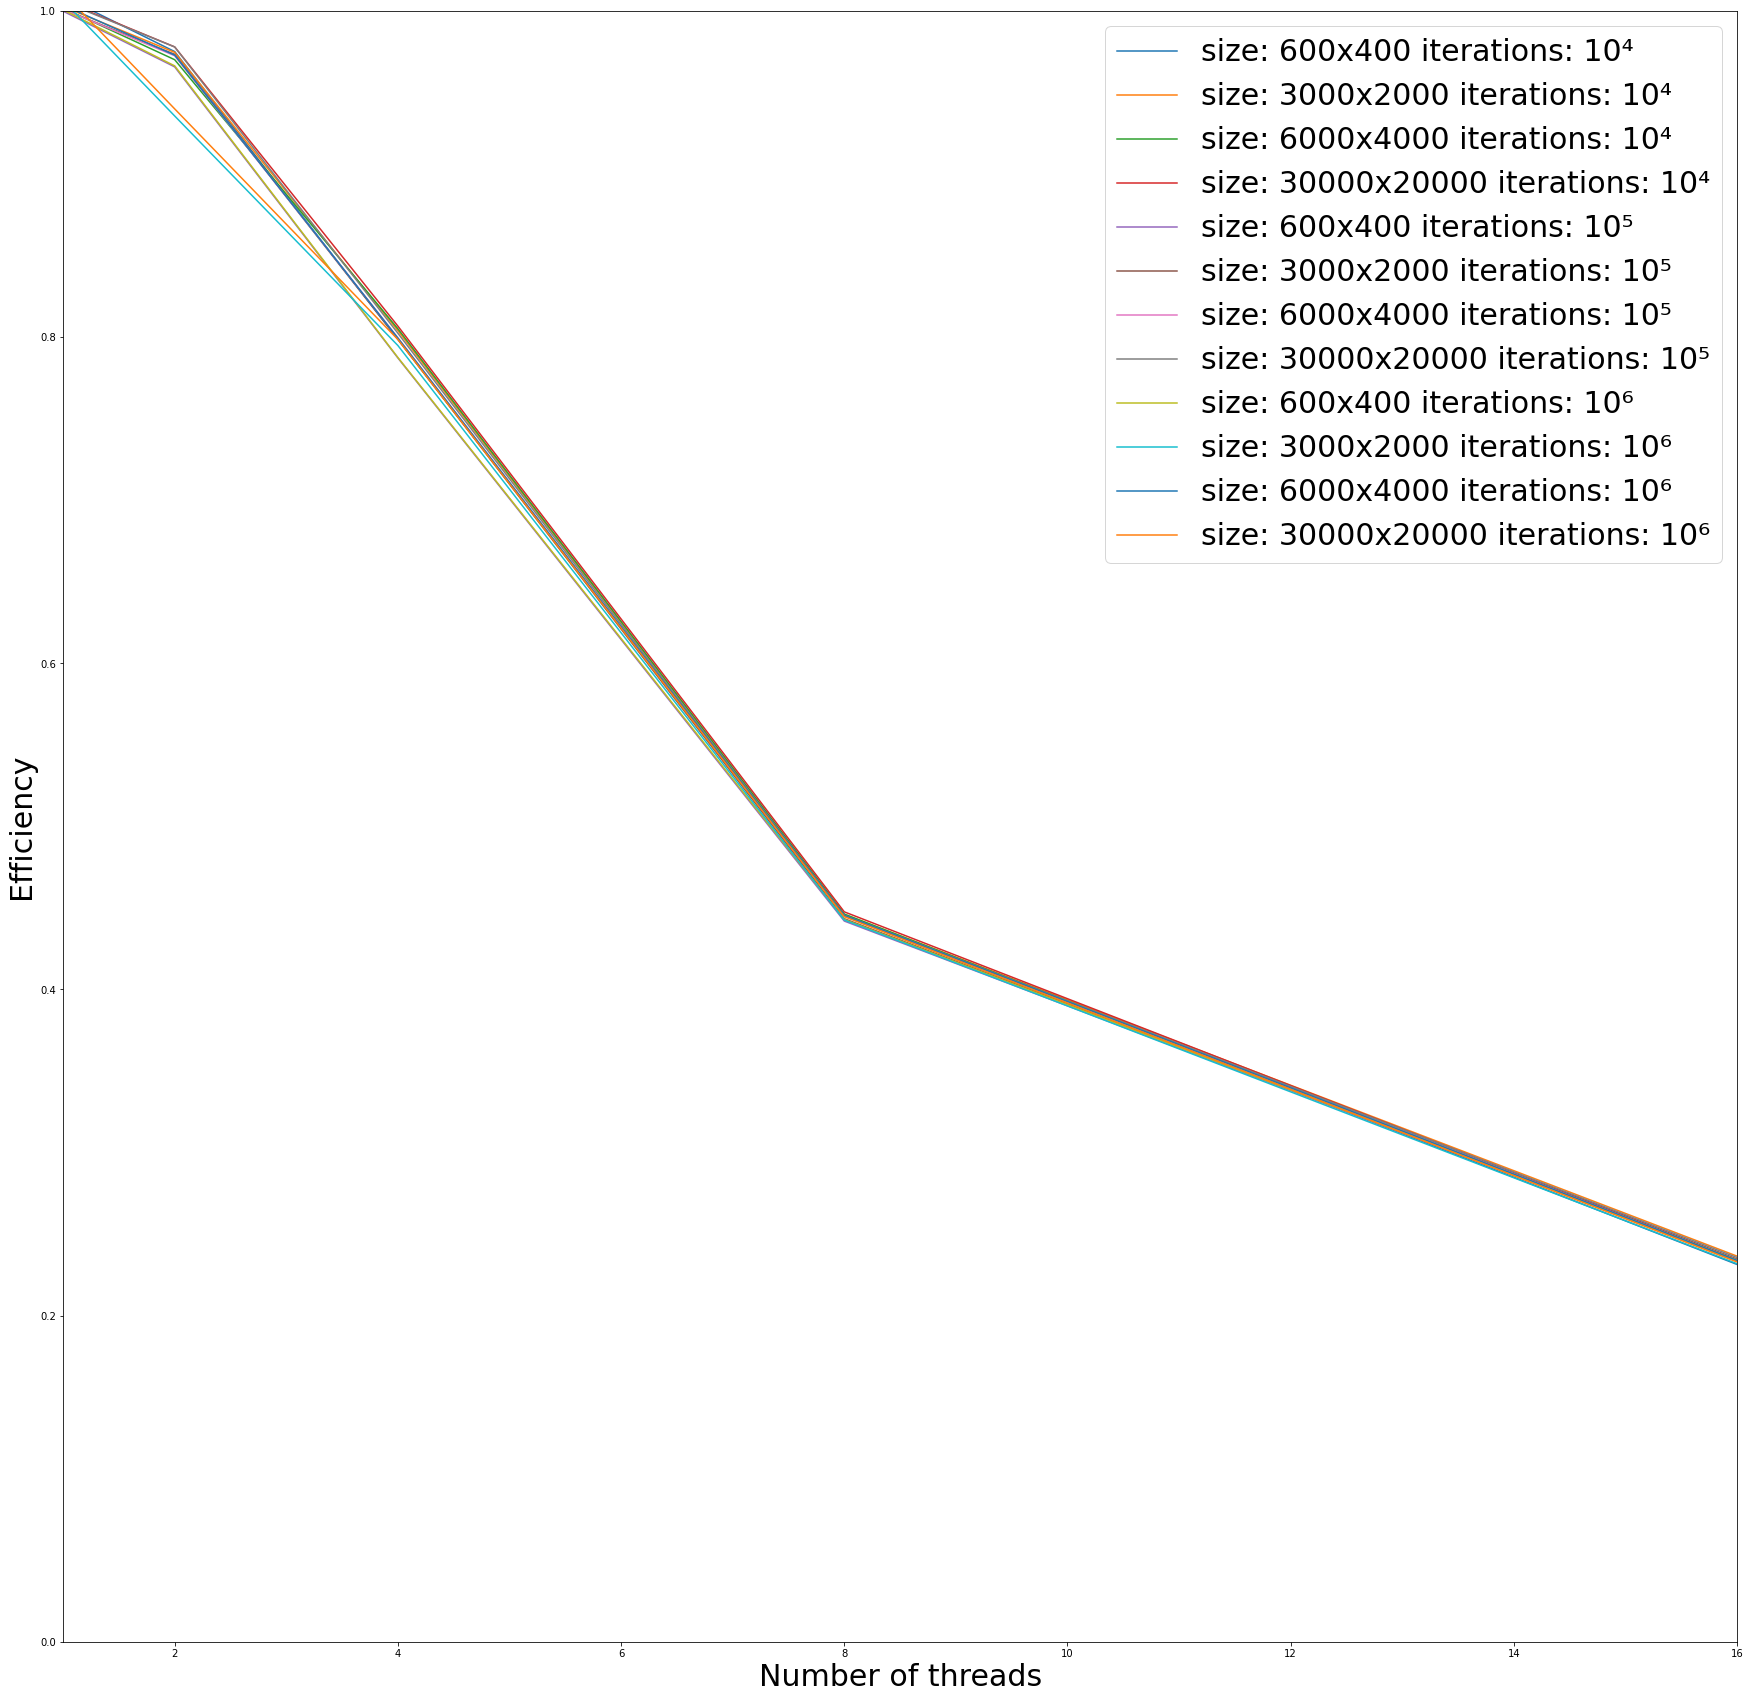

In [428]:
plot_efficiency(get_efficiency(speedup_guided))